# Image classification

This file includes a simple example of using CLIP to run zero-shot image classification on some test data and can be easily adapted to run on your own data.

The first thing we need to do is import the various libraries required to load, process and display the images.

In [1]:
## Import all required packages for this example.
from PIL import Image  ## This library manages reading images from file.
from transformers import pipeline  ## The library manages many pretrained models.
import glob  ## This library efficiently works with multiple files in a directory.
import matplotlib.pyplot as plt  ## This package is useful for displaying the images.

The next step is to prepare the model for classification. Since we're working with a pretrained model, there are tools already in place to load them with only a few lines of code. This may take a little bit of time when run for the first time as the model will need to be downloaded (typically a few hundred MB).

In [2]:
model = 'openai/clip-vit-base-patch32'  ## This determines the model and version we want.
classifier = pipeline(model=model, task='zero-shot-image-classification')  ## This creates the classifier object with
## many helpful defaults.

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Now that we have the model ready for classification, we need some images. There are many ways that datasets can be managed, but the approach here is designed for ease of use. It takes a specified folder location (using a relative path) and loads all the images within. As a result, changing to a different dataset is as simple as changing the `folder` variable.

In [3]:
folder = 'example_data/coco/*'  ## Note * is a wildcard character, meaning match everything.
images = sorted(glob.glob(folder))
images = [Image.open(i) for i in images[:10]]

The images are now processed in a format that Python can understand and is compatible with all common image tools. For example, we can view one of the images using `matplotlib.pyplot`.

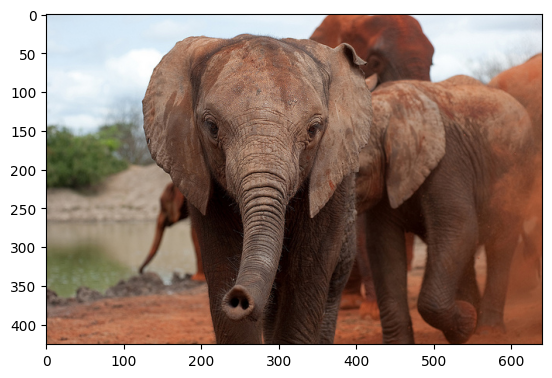

In [4]:
plt.imshow(images[0])

We're almost ready to run the classification task, but we're missing one final set of inputs. We need to define our set of classes, i.e. the labels we are looking for in the images. We give this list in `classes`, describing each in natural language. As an example, we could see whether our images show an `elephant` or a `man`.

In [ ]:
classes = ['elephant','man']  ## Use this format to describe your set of labels, you can provide more than two at a time.
predictions = classifier(images, candidate_labels=classes)  ## Apply the zero-shot classifier.

for img,pred in zip(images,predictions):  ## Run through each image and prediction in turn and display them with the
    plt.imshow(img)           ## most likely label.
    plt.title(pred[0])
    plt.axis('off')
    plt.show()

The labels we provide here matter: there will always be a "best fit", even if the label that would be assigned by a person is not included in your set. There are two ways to address this shortcoming.

Firstly, you can provide more labels. This is helpful in cases where the classes may be confused. As an example, if you have a dataset of vehicles and use the classes `['car','boat','plane']`, you will probably find that vans and trucks are labelled as `car`s. If this distinction is important for your application, then updating your class list should be sufficient.

The second way to improve the quality of the labels assigned by the model is to use the `score` provided by the model for the best label. This is akin to the model's "confidence" that each class label is the right one. Choosing the right score threshold requires a bit of trial and error depending on the labels provided and the dataset in question.

As an example below, we'll test a different label combination on the same images. Try adding in your own labels to see how they change the results.

In [ ]:
classes = ['elephant','man','woman']  ## Use this format to describe your set of labels, you can provide more than two at a time.
predictions = classifier(images, candidate_labels=classes)  ## Apply the zero-shot classifier.

for img,pred in zip(images,predictions):  ## Run through each image and prediction in turn and display them with the
    plt.imshow(img)           ## most likely label.
    plt.title(pred[0])
    plt.axis('off')
    plt.show()

The final note to raise here are a few of the cases where this classification method can struggle.

The single biggest challenge for classification in this way is images that contain aspects of more than one class. Traditionally, classification methods return only the class with the highest score, whereas multiple labels may be appropriate. Multiple labels can be collected by returning all those above a threshold, or classifiying multiple times with slightly different label sets (e.g. removing one class each time).

Moreover, zero-shot classification is only as effective as the set of labels you provide. As mentioned earlier, this aspect is best addressed with careful trial and refinement based on the particular dataset. Here you can balance the number of classes, the class labels and any threshold needed to produce suitable results for your application.

In [ ]:
# You can load a video as a series of images using the cv2 package.
import cv2
from PIL import Image

video_path = "your_video.mp4"
cap = cv2.VideoCapture(video_path)

frames = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR (OpenCV) to RGB (PIL expects RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to PIL Image
    pil_img = Image.fromarray(frame_rgb)

    frames.append(pil_img)

cap.release()

## At this point, frames is in exactly the same format as if a series of images had been loaded from file.